In [18]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import lmpsetup
import hmdsetup

import lmp
import hmd

import numpy as np
import matplotlib.pyplot as plt
import analysis

import scipy.constants as cnt

import shutil
import re
import os
import mdtraj as md
import statsmodels.tsa.stattools
import MDAnalysis.analysis as mda
import scipy
from matplotlib.lines import Line2D

WT_COL='darkblue'
D7_COL='royalblue'

D4_COL = 'red'
D12_COL = 'orange'

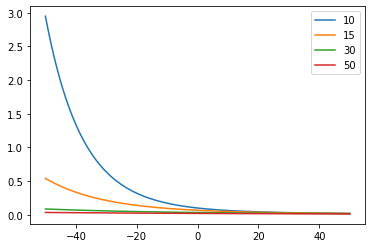

In [37]:
def test(r, lb, b):
    t = lb*(1-np.exp(-r/b))/r
    return t

r = np.linspace(-50,50,2000)
for b in [10,15,30,50]:
        plt.plot(r, test(r,1,b), label=b)
plt.legend()

In [18]:
import numpy as np
t = np.array([0.9, 0.925, 0.95, 0.975, 1., 1.025, 1.05, 1.075, 1.1])
t[np.argwhere(t == 0.975)[0][0]:]

array([1.   , 1.025, 1.05 , 1.075, 1.1  ])

In [25]:
t = lmpsetup.LMPSetup(oliba_wd='/home/adria/what',
                      model='HPS-T',
                      protein='CPEB4',
                      temperatures=[280],
                      hps_scale=0.7)

t.get_hps_pairs(T=0)
t.hps_pairs

['pair_coeff          *       *       0.000000   0.000    0.000000   0.000   0.000\n',
 'pair_coeff          1       1       0.200000   5.040    0.162452  15.120   0.000\n',
 'pair_coeff          1       2       0.200000   5.800    0.151813  17.400   0.000\n',
 'pair_coeff          1       3       0.200000   5.360    0.310773  16.080   0.000\n',
 'pair_coeff          1       4       0.200000   5.310    0.284246  15.930   0.000\n',
 'pair_coeff          1       5       0.200000   5.260    0.304357  15.780   0.000\n',
 'pair_coeff          1       6       0.200000   5.530    0.339152  16.590   0.000\n',
 'pair_coeff          1       7       0.200000   5.480    0.312624  16.440   0.000\n',
 'pair_coeff          1       8       0.200000   4.770    0.323276  14.310   0.000\n',
 'pair_coeff          1       9       0.200000   5.560    0.087678  16.680   0.000\n',
 'pair_coeff          1      10       0.200000   5.610    0.247587  16.830   0.000\n',
 'pair_coeff          1      11       0.200

&A&C&D&E&F&G&H&I&K&L&M&N&P&Q&R&S&T&V&W&Y
A&-0.142&-0.257&-0.004&0.022&-0.425&-0.087&-0.100&-0.393&0.049&-0.438&-0.307&-0.023&-0.049&-0.030&-0.022&-0.046&-0.088&-0.320&-0.291&-0.228
C&-0.257&-0.510&-0.100&-0.081&-0.558&-0.201&-0.261&-0.518&-0.038&-0.562&-0.449&-0.124&-0.189&-0.160&-0.122&-0.161&-0.195&-0.445&-0.443&-0.337
D&-0.004&-0.100&0.062&0.088&-0.245&0.011&-0.088&-0.203&-0.001&-0.234&-0.122&-0.001&0.046&0.028&-0.084&0.005&-0.018&-0.110&-0.158&-0.147
E&0.022&-0.081&0.088&0.103&-0.256&0.061&-0.065&-0.216&-0.018&-0.260&-0.165&0.022&0.055&0.034&-0.081&0.026&-0.009&-0.135&-0.178&-0.151
F&-0.425&-0.558&-0.245&-0.256&-0.756&-0.333&-0.419&-0.699&-0.228&-0.758&-0.661&-0.281&-0.349&-0.329&-0.312&-0.318&-0.353&-0.625&-0.607&-0.539
G&-0.087&-0.201&0.011&0.061&-0.333&-0.077&-0.065&-0.285&0.070&-0.337&-0.233&-0.009&-0.027&0.001&-0.007&-0.020&-0.055&-0.231&-0.237&-0.181
H&-0.100&-0.261&-0.088&-0.065&-0.419&-0.065&-0.187&-0.334&0.043&-0.388&-0.312&-0.055&-0.078&-0.042&-0.066&-0.059&-0.101&-0.258&